In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('winequality-red.csv')
data.shape

(1599, 12)

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


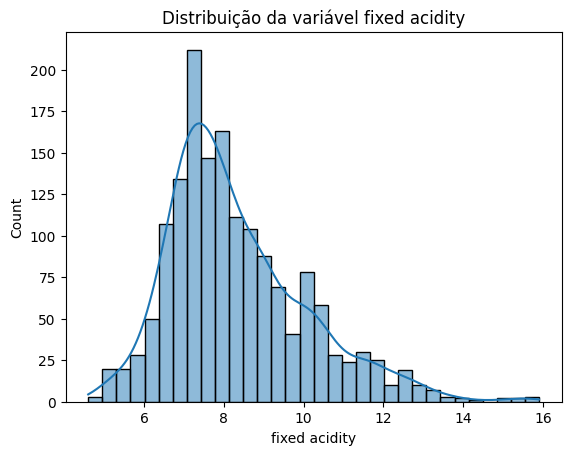

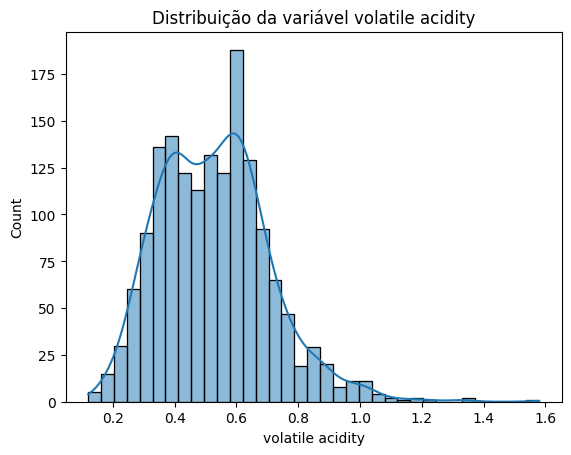

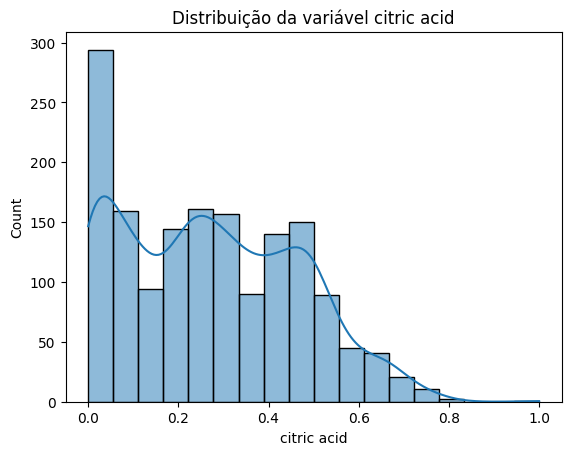

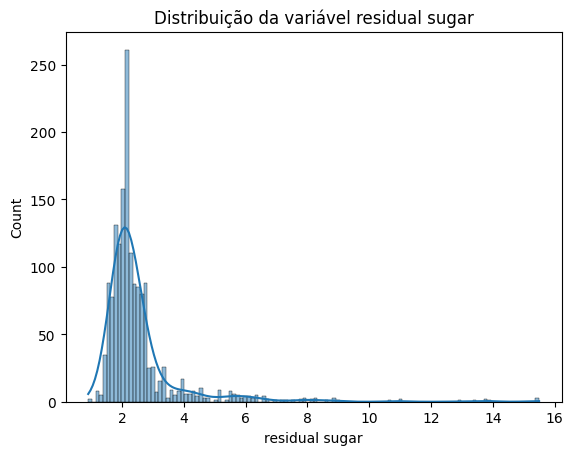

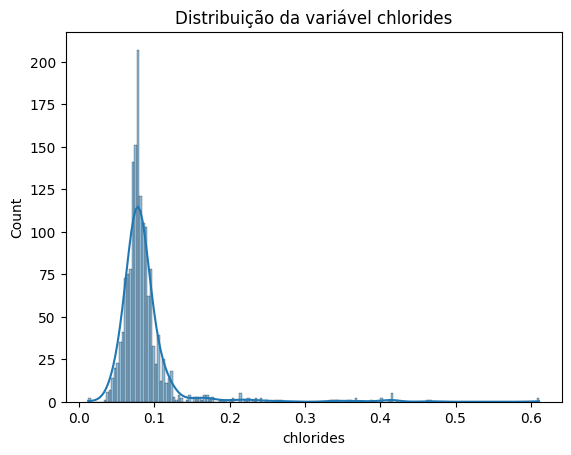

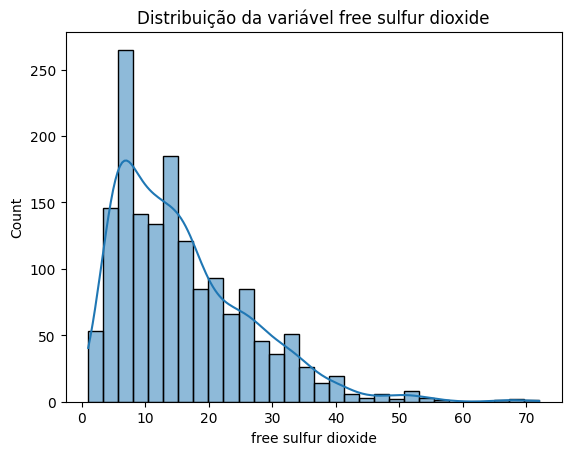

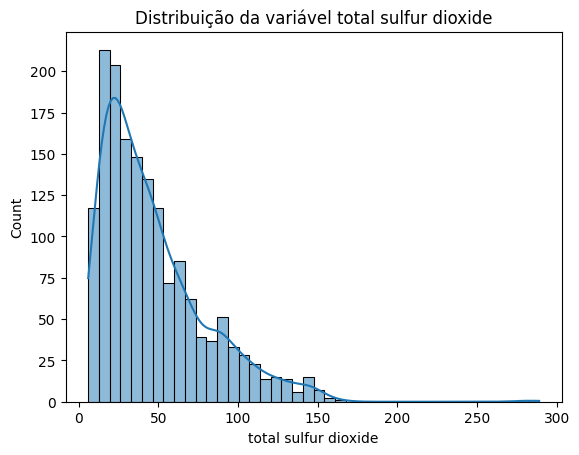

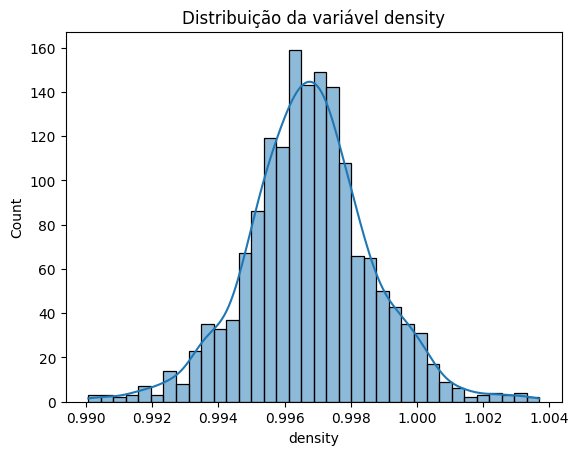

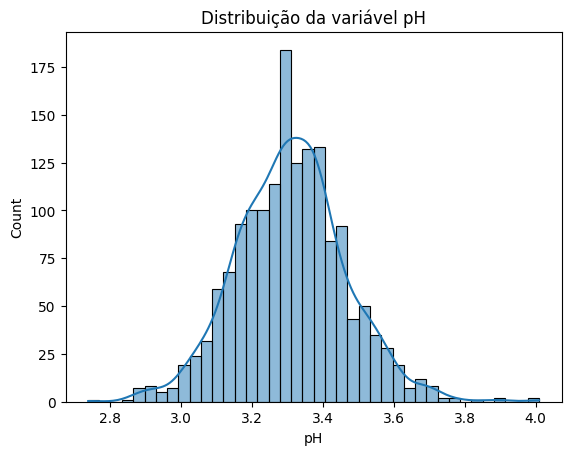

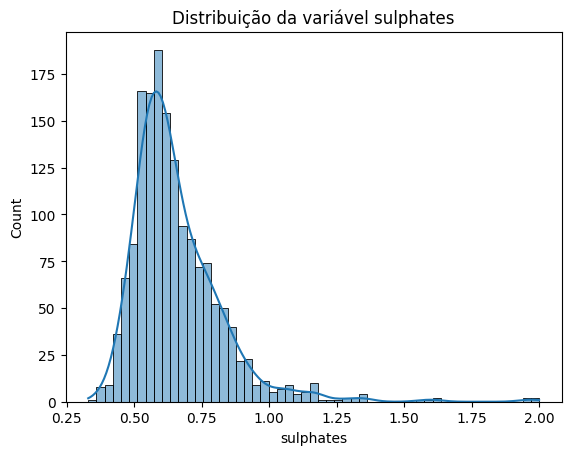

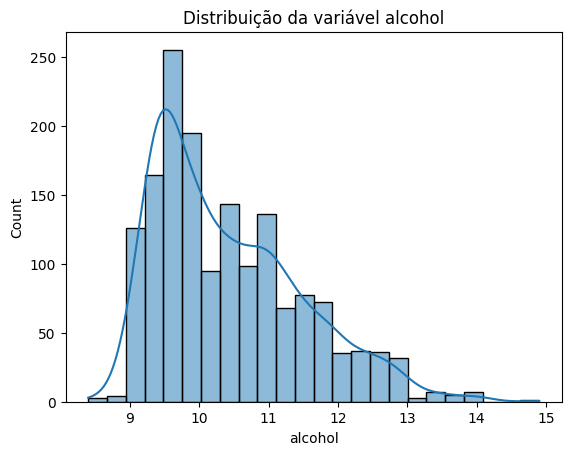

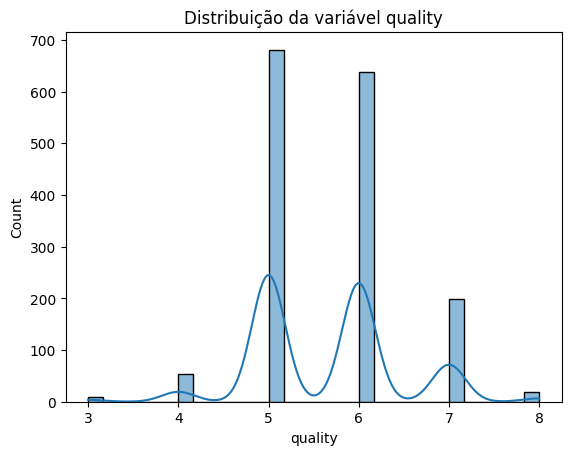

In [7]:
for col in data:
    sns.histplot(data=data, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show()

In [9]:
for col in data.drop(columns=['quality']):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1

    aux_outliers = data[(data[col] < (q1 - 1.5 * IQR)) | (data[col] > (q3 + 1.5 * IQR))]

    indices_outliers = aux_outliers.index.tolist()

    if len(indices_outliers) > 1:
        print(f"Outliers da variável {col}: {indices_outliers}")
        print(f"{len(indices_outliers)} outliers!")
    else:
        print(f"Não há outliers na variável {col}\n")
    print('='*80, '\n')

Outliers da variável fixed acidity: [205, 206, 243, 244, 264, 294, 328, 338, 339, 347, 353, 359, 363, 364, 366, 374, 381, 391, 394, 409, 429, 440, 442, 446, 470, 472, 509, 510, 516, 538, 544, 548, 554, 555, 557, 559, 560, 564, 565, 596, 599, 601, 603, 611, 652, 680, 811, 814, 1224]
49 outliers!

Outliers da variável volatile acidity: [38, 94, 120, 126, 127, 134, 199, 553, 672, 690, 700, 705, 710, 724, 899, 1261, 1299, 1312, 1467]
19 outliers!

Não há outliers na variável citric acid


Outliers da variável residual sugar: [9, 11, 14, 15, 18, 33, 35, 39, 40, 55, 57, 64, 65, 154, 155, 156, 157, 163, 164, 192, 215, 269, 270, 271, 272, 274, 275, 277, 278, 279, 283, 324, 325, 327, 353, 364, 366, 374, 375, 378, 395, 396, 400, 408, 409, 413, 415, 442, 455, 480, 484, 494, 501, 502, 510, 515, 516, 538, 539, 541, 554, 555, 556, 557, 558, 559, 564, 595, 606, 608, 624, 625, 645, 649, 652, 659, 690, 705, 719, 740, 800, 878, 884, 889, 903, 904, 910, 911, 913, 917, 923, 941, 944, 946, 974, 1032, 1038,

In [ ]:
data.quality.value_counts(normalize=True) # normalizando, encontramos a porcentagem da frequência de cada valor
# data.quality.value_counts()

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: proportion, dtype: float64

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

<Axes: xlabel='quality', ylabel='Count'>

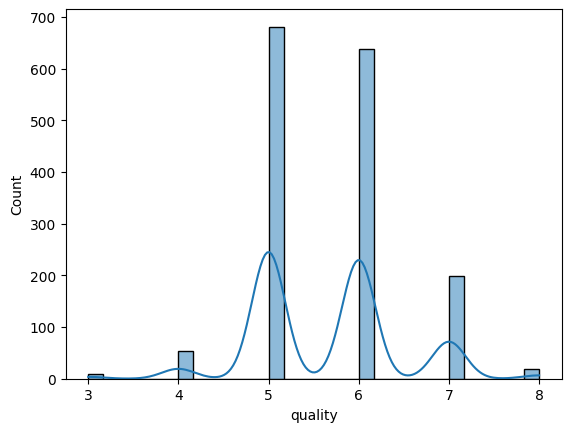

In [15]:
display(data.quality.describe())
sns.histplot(data=data, x='quality', kde=True)

<Axes: >

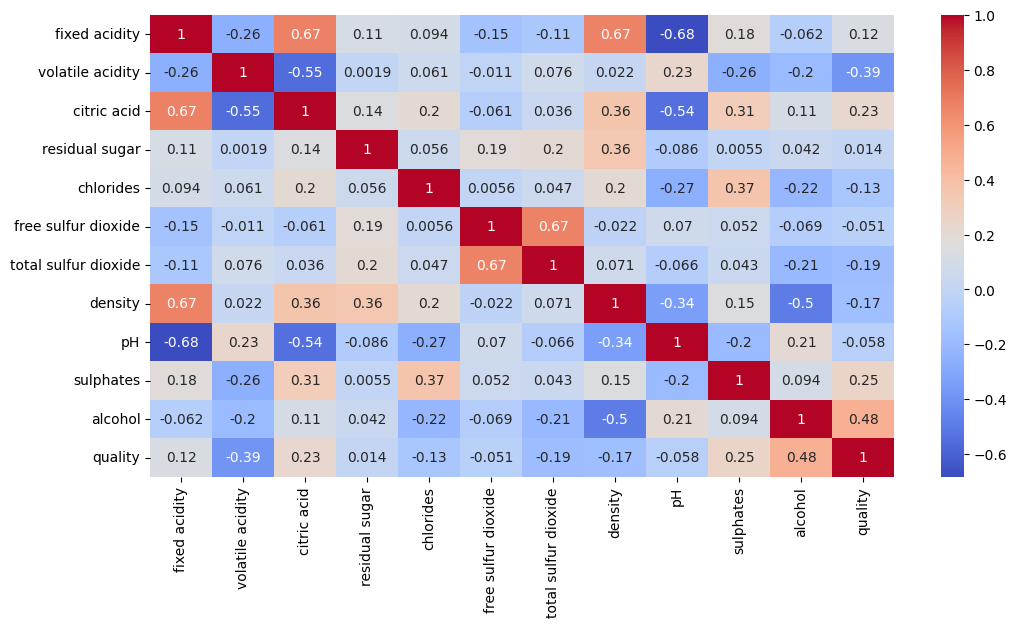

In [18]:
# data.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [19]:
data.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


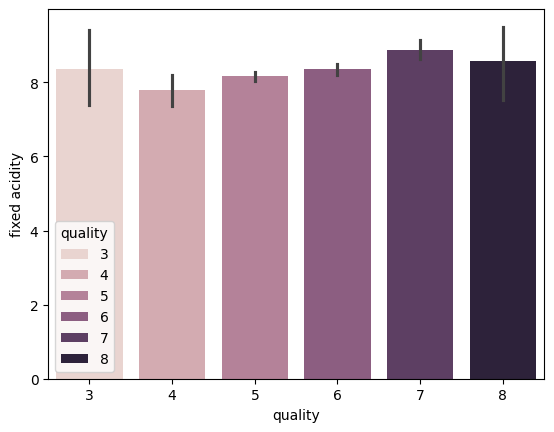

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


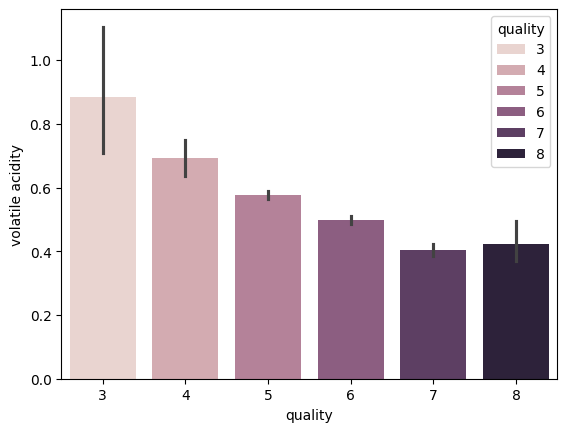

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


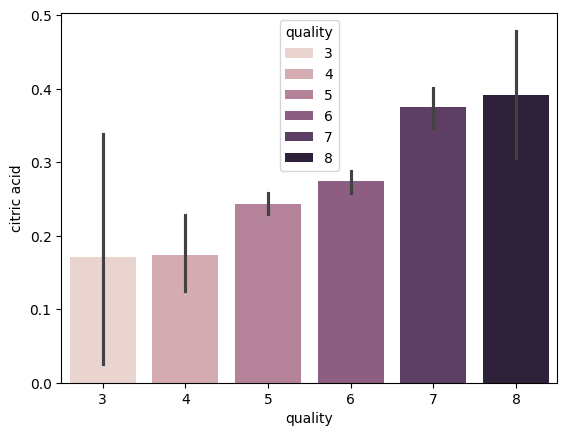

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


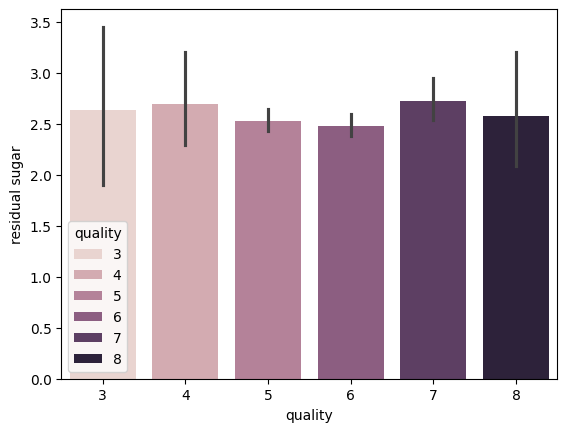

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


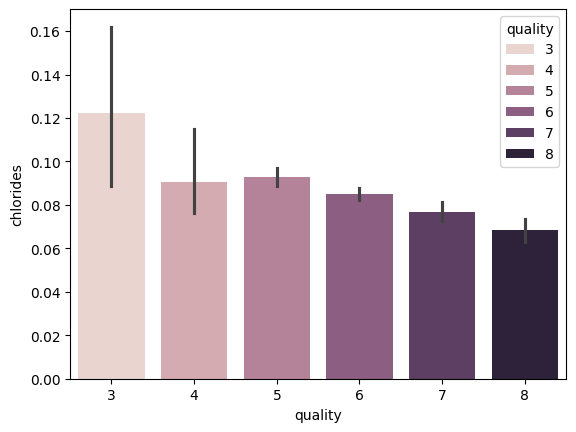

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


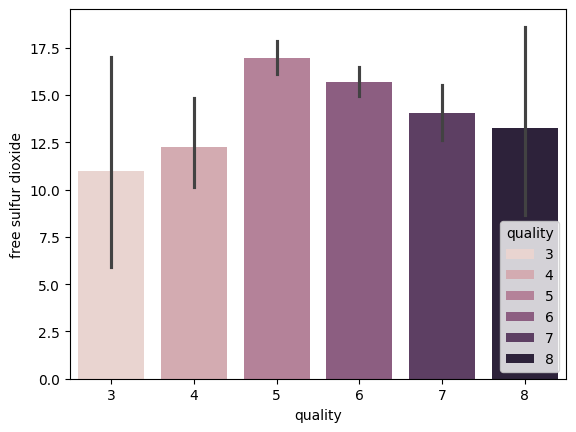

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


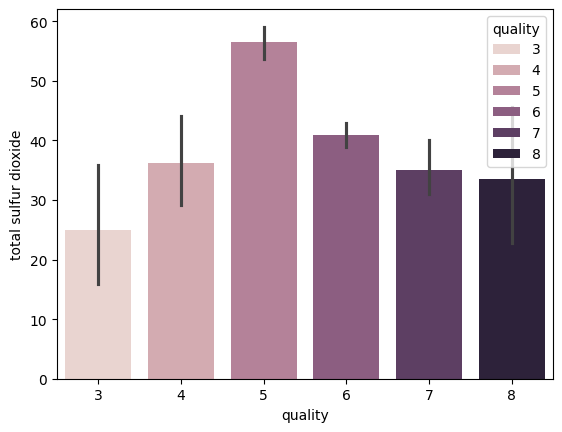

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


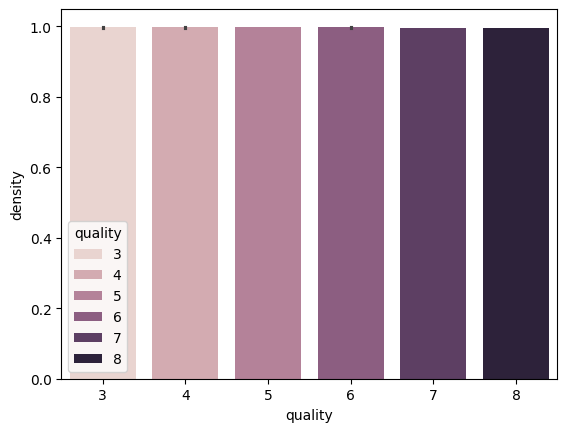

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


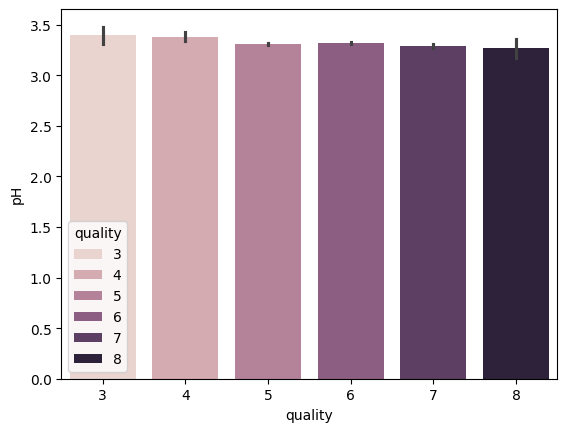

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


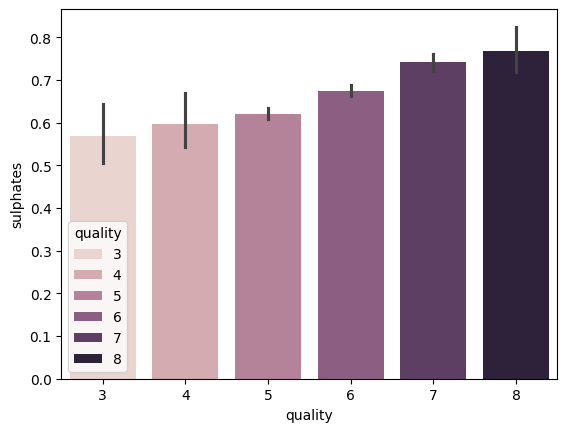

/tmp/ipykernel_713724/2829708250.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=data, x='quality', y=col, ci=95, hue='quality')


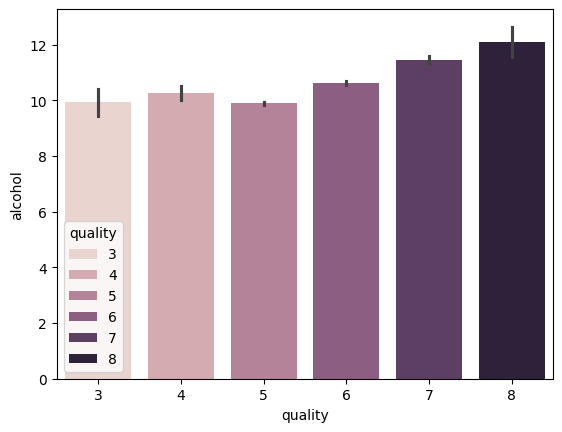

In [ ]:
for col in data.drop(columns=['quality']):
    sns.barplot(data=data, x='quality', y=col, errorbar=('ci', 95), hue='quality')
    plt.show()

In [21]:
data['quality_bin'] = data['quality'].apply(lambda x: 'bom' if x >5 else 'ruim')
data_bin = data.drop(columns=['quality'])
data_bin

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,ruim
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,ruim
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bom
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,ruim
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,ruim
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bom
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bom
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,ruim


In [22]:
data_bin.to_csv('winequality-red-bin.csv', index=False)

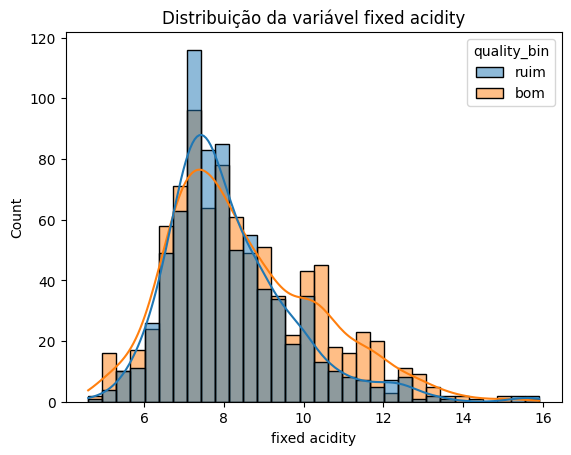

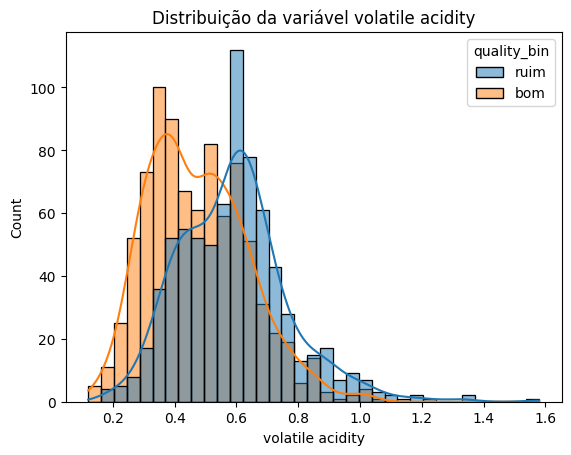

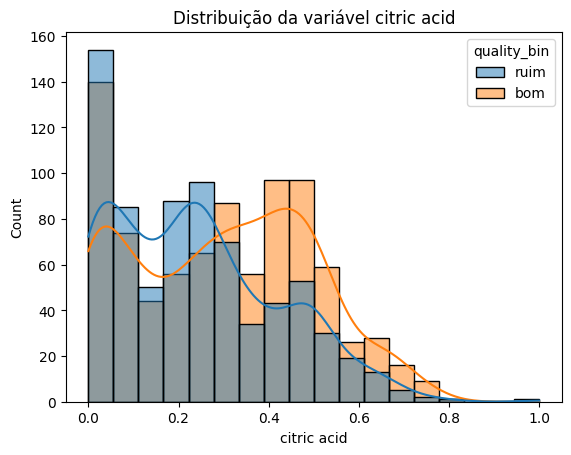

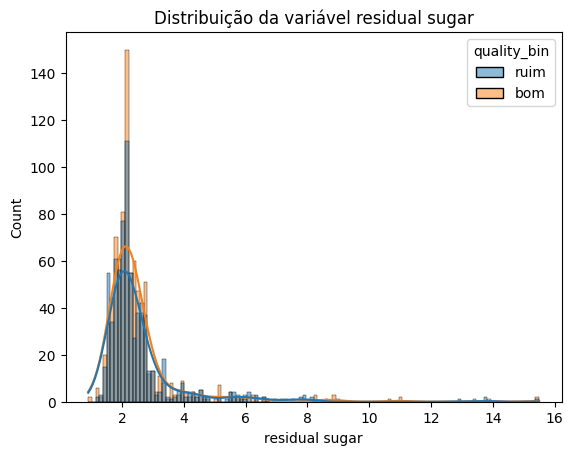

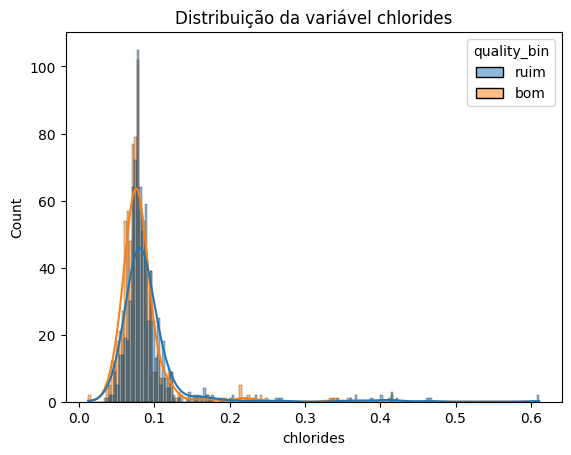

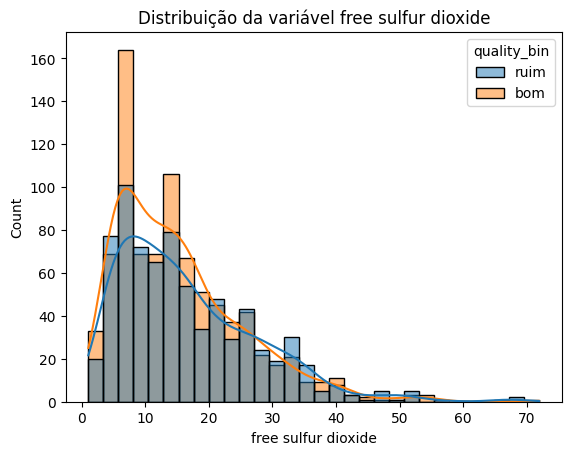

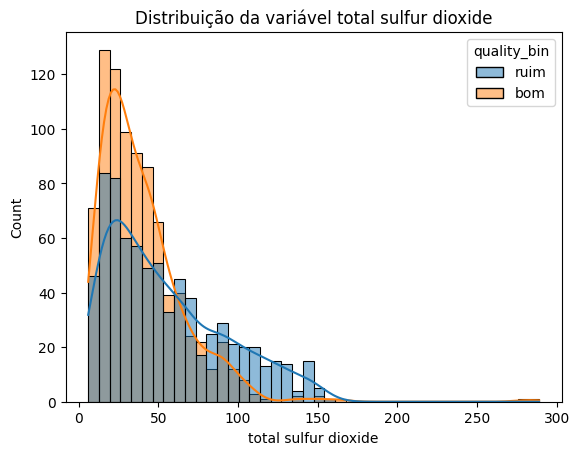

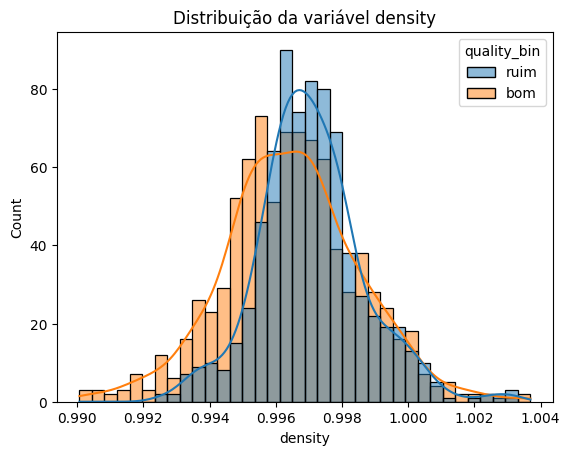

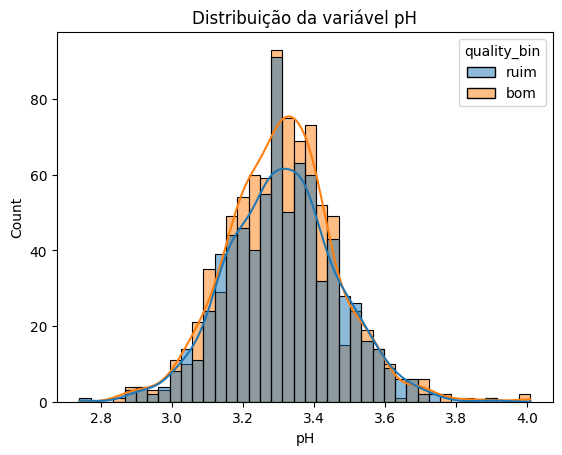

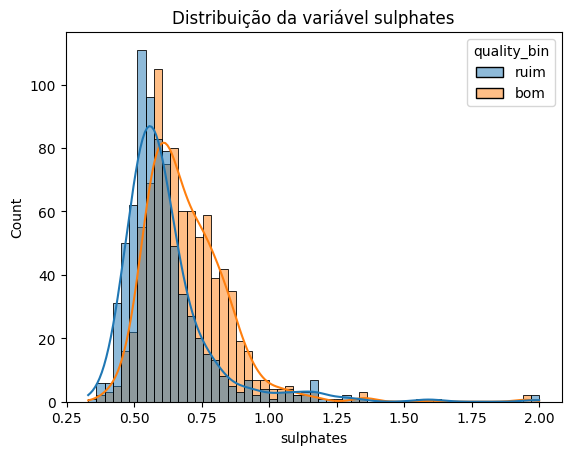

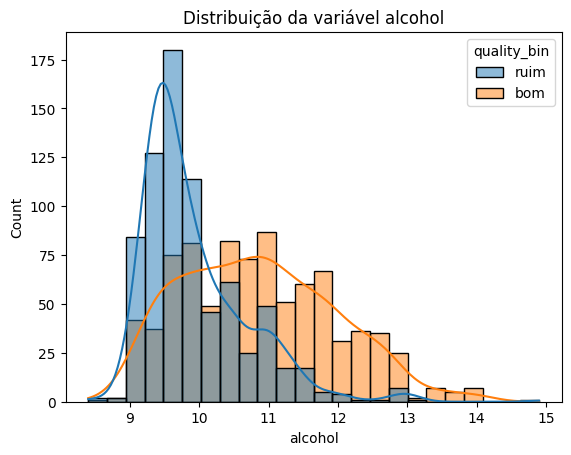

In [23]:
for col in data_bin.drop(columns=['quality_bin']):
    sns.histplot(data=data_bin, x=col,kde=True, hue='quality_bin').set_title(f"Distribuição da variável {col}")
    plt.show()